In [1]:
pip install --user uk-covid19


Note: you may need to restart the kernel to use updated packages.


In [2]:
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from uk_covid19 import Cov19API
import json

In [4]:
pwd

'/Users/DEV/Desktop/Uni/Masters material /Computer Programming/diy-covid19dash-main'

In [5]:
filters = [
    'areaType=overview' # note each metric-value pair is inside one string
    
]

In [6]:
# values here are the names of the PHE metrics
structure = {
    "date": "date",
    "cases": "newCasesByPublishDate",
    "area": "areaName",
    "alladmissions": "cumAdmissions",
    "newadmissions": "newAdmissions",
    "deaths": "newDeaths28DaysByDeathDate"
    
}


In [7]:
api = Cov19API(filters=filters, structure=structure)

In [8]:
overview=api.get_json()

In [9]:
print(overview)

{'data': [{'date': '2020-11-26', 'cases': 17555, 'area': 'United Kingdom', 'alladmissions': None, 'newadmissions': None, 'deaths': None}, {'date': '2020-11-25', 'cases': 18213, 'area': 'United Kingdom', 'alladmissions': None, 'newadmissions': None, 'deaths': None}, {'date': '2020-11-24', 'cases': 11299, 'area': 'United Kingdom', 'alladmissions': None, 'newadmissions': None, 'deaths': 300}, {'date': '2020-11-23', 'cases': 15450, 'area': 'United Kingdom', 'alladmissions': None, 'newadmissions': None, 'deaths': 360}, {'date': '2020-11-22', 'cases': 18662, 'area': 'United Kingdom', 'alladmissions': None, 'newadmissions': None, 'deaths': 407}, {'date': '2020-11-21', 'cases': 19875, 'area': 'United Kingdom', 'alladmissions': 209918, 'newadmissions': 1434, 'deaths': 364}, {'date': '2020-11-20', 'cases': 20252, 'area': 'United Kingdom', 'alladmissions': 208484, 'newadmissions': 1513, 'deaths': 408}, {'date': '2020-11-19', 'cases': 22915, 'area': 'United Kingdom', 'alladmissions': 206971, 'newa

In [10]:
print(type(overview))

<class 'dict'>


In [11]:
filters = [
    "areaType=nation",
    "areaName=England",
]

structure = {
    "males": "maleCases",
    "females": "femaleCases",
}

api = Cov19API(filters=filters, structure=structure)

agedistribution=api.get_json()

print(agedistribution)

{'data': [{'males': [{'age': '10_to_14', 'value': 22567, 'rate': 1245.1}, {'age': '5_to_9', 'value': 12792, 'rate': 706.9}, {'age': '35_to_39', 'value': 45629, 'rate': 2400.8}, {'age': '90+', 'value': 9335, 'rate': 5615.6}, {'age': '30_to_34', 'value': 50571, 'rate': 2616}, {'age': '45_to_49', 'value': 44325, 'rate': 2607.1}, {'age': '15_to_19', 'value': 49243, 'rate': 2863.9}, {'age': '65_to_69', 'value': 22638, 'rate': 1673.4}, {'age': '40_to_44', 'value': 42298, 'rate': 2287.5}, {'age': '60_to_64', 'value': 33281, 'rate': 2179.2}, {'age': '20_to_24', 'value': 59816, 'rate': 3767.4}, {'age': '25_to_29', 'value': 52695, 'rate': 2939.4}, {'age': '80_to_84', 'value': 17040, 'rate': 2681.5}, {'age': '0_to_4', 'value': 11773, 'rate': 695.3}, {'age': '75_to_79', 'value': 17527, 'rate': 1945.9}, {'age': '85_to_89', 'value': 13745, 'rate': 3917.6}, {'age': '55_to_59', 'value': 43645, 'rate': 2265}, {'age': '50_to_54', 'value': 47655, 'rate': 2590.9}, {'age': '70_to_74', 'value': 20236, 'rate

In [12]:
import json

with open("overview.json", "wt") as OUTF:
    json.dump(overview, OUTF)
    
with open("agegenderdistribution.json", "wt") as OUTF:
    json.dump(agedistribution, OUTF)

In [13]:
### For a comparison of hospital admissions with planned capacity ###

filters = [
    "areaType=overview",
]


structure = {
    "date":"date",
    "hospitalcases": "hospitalCases",
    "newadmissions": "newAdmissions",
    "plannedcapacity": "plannedCapacityByPublishDate",
}

api = Cov19API(filters=filters, structure=structure)

ocvscap=api.get_json()

print(ocvscap)


{'data': [{'date': '2020-11-25', 'hospitalcases': None, 'newadmissions': None, 'plannedcapacity': 655225}, {'date': '2020-11-24', 'hospitalcases': 16341, 'newadmissions': None, 'plannedcapacity': 649225}, {'date': '2020-11-23', 'hospitalcases': 16596, 'newadmissions': None, 'plannedcapacity': 646956}, {'date': '2020-11-22', 'hospitalcases': 16218, 'newadmissions': None, 'plannedcapacity': 657006}, {'date': '2020-11-21', 'hospitalcases': 16026, 'newadmissions': 1434, 'plannedcapacity': 659188}, {'date': '2020-11-20', 'hospitalcases': 16180, 'newadmissions': 1513, 'plannedcapacity': 658426}, {'date': '2020-11-19', 'hospitalcases': 16449, 'newadmissions': 1652, 'plannedcapacity': 658871}, {'date': '2020-11-18', 'hospitalcases': 16510, 'newadmissions': 1759, 'plannedcapacity': 657571}, {'date': '2020-11-17', 'hospitalcases': 16481, 'newadmissions': 1690, 'plannedcapacity': 650791}, {'date': '2020-11-16', 'hospitalcases': 16360, 'newadmissions': 1749, 'plannedcapacity': 640517}, {'date': '2

In [14]:
with open("ocvscap.json", "wt") as OUTF:
    json.dump(ocvscap, OUTF)

In [15]:
### for a comparison of the number of new cases with the number of tests ###

filters = [
    "areaType=nation",
    "areaName=England",
]

structure = {
    "date": "date",
    "newcases": "newCasesByPublishDate",
    "newtests": "newTestsByPublishDate",
}

api = Cov19API(filters=filters, structure=structure)

testcase=api.get_json()

print(testcase)

{'data': [{'date': '2020-11-26', 'newcases': 14637, 'newtests': None}, {'date': '2020-11-25', 'newcases': 15893, 'newtests': 275109}, {'date': '2020-11-24', 'newcases': 9854, 'newtests': 257557}, {'date': '2020-11-23', 'newcases': 13329, 'newtests': 166447}, {'date': '2020-11-22', 'newcases': 16668, 'newtests': 204444}, {'date': '2020-11-21', 'newcases': 17615, 'newtests': 292050}, {'date': '2020-11-20', 'newcases': 17845, 'newtests': 319264}, {'date': '2020-11-19', 'newcases': 20291, 'newtests': 314969}, {'date': '2020-11-18', 'newcases': 17189, 'newtests': 292040}, {'date': '2020-11-17', 'newcases': 17549, 'newtests': 237965}, {'date': '2020-11-16', 'newcases': 19423, 'newtests': 188045}, {'date': '2020-11-15', 'newcases': 21998, 'newtests': 238240}, {'date': '2020-11-14', 'newcases': 24298, 'newtests': 290889}, {'date': '2020-11-13', 'newcases': 24540, 'newtests': 324618}, {'date': '2020-11-12', 'newcases': 30843, 'newtests': 322226}, {'date': '2020-11-11', 'newcases': 19970, 'newte

In [16]:
with open("testcase.json", "wt") as OUTF:
    json.dump(testcase, OUTF)

In [17]:
### new cases in London as a fraction of the population ###

filters = [
    "areaName=London",
]

structure = {
    "date": "date",
    "caserate": "cumCasesBySpecimenDateRate", #Rate of cumulative cases by publish date per 100k resident population
    
}

api = Cov19API(filters=filters, structure=structure)

caserateLondon=api.get_json()

print(caserateLondon)

{'data': [{'date': '2020-11-25', 'caserate': 1716.8}, {'date': '2020-11-24', 'caserate': 1716}, {'date': '2020-11-23', 'caserate': 1700.4}, {'date': '2020-11-22', 'caserate': 1674.8}, {'date': '2020-11-21', 'caserate': 1658}, {'date': '2020-11-20', 'caserate': 1641.4}, {'date': '2020-11-19', 'caserate': 1617.6}, {'date': '2020-11-18', 'caserate': 1592.6}, {'date': '2020-11-17', 'caserate': 1563.8}, {'date': '2020-11-16', 'caserate': 1534.9}, {'date': '2020-11-15', 'caserate': 1500.6}, {'date': '2020-11-14', 'caserate': 1480.9}, {'date': '2020-11-13', 'caserate': 1459.6}, {'date': '2020-11-12', 'caserate': 1429.5}, {'date': '2020-11-11', 'caserate': 1398.2}, {'date': '2020-11-10', 'caserate': 1365.8}, {'date': '2020-11-09', 'caserate': 1335.4}, {'date': '2020-11-08', 'caserate': 1301}, {'date': '2020-11-07', 'caserate': 1281.4}, {'date': '2020-11-06', 'caserate': 1263.1}, {'date': '2020-11-05', 'caserate': 1239.7}, {'date': '2020-11-04', 'caserate': 1216.3}, {'date': '2020-11-03', 'case

In [18]:
with open("caserateLondon.json", "wt") as OUTF:
    json.dump(caserateLondon, OUTF)

In [19]:
################################################################
###############################################################
### The next section is visualising the JSON data part  #######
###############################################################
##############################################################

In [20]:
import pandas as pnd
import matplotlib.pyplot as plt
import json

In [21]:
# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [22]:
## first , load data from JSON files ##
with open("timeseries.json", "rt") as INFILE:
    data = json.load(INFILE)

data    

{'data': [{'date': '2020-11-22',
   'cases': 18662,
   'hospital': None,
   'deaths': None},
  {'date': '2020-11-21', 'cases': 19875, 'hospital': None, 'deaths': None},
  {'date': '2020-11-20', 'cases': 20252, 'hospital': None, 'deaths': None},
  {'date': '2020-11-19', 'cases': 22915, 'hospital': None, 'deaths': 82},
  {'date': '2020-11-18', 'cases': 19609, 'hospital': 1746, 'deaths': 81.5},
  {'date': '2020-11-17', 'cases': 20051, 'hospital': 1682, 'deaths': 80.8},
  {'date': '2020-11-16', 'cases': 21363, 'hospital': 1738, 'deaths': 80.3},
  {'date': '2020-11-15', 'cases': 24962, 'hospital': 1645, 'deaths': 79.7},
  {'date': '2020-11-14', 'cases': 26860, 'hospital': 1595, 'deaths': 79.1},
  {'date': '2020-11-13', 'cases': 27301, 'hospital': 1619, 'deaths': 78.5},
  {'date': '2020-11-12', 'cases': 33470, 'hospital': 1886, 'deaths': 77.9},
  {'date': '2020-11-11', 'cases': 22950, 'hospital': 1936, 'deaths': 77.3},
  {'date': '2020-11-10', 'cases': 20412, 'hospital': 1826, 'deaths': 76.7

In [23]:
## We then need to sort the data to be able to use it ##
## aim is to extract values for the x axis of the plot - *dates* - 
## The dates will be the index for the DataFrame ##
## The data proper will be in the columns ##
## visualise DataFrame as a spreadsheet for now ##

In [24]:
## The data consists of a dictionary, actual data is stored ##
## as a list of dictionaries under the *data* key ##

In [25]:
datalist=data['data']
datalist

[{'date': '2020-11-22', 'cases': 18662, 'hospital': None, 'deaths': None},
 {'date': '2020-11-21', 'cases': 19875, 'hospital': None, 'deaths': None},
 {'date': '2020-11-20', 'cases': 20252, 'hospital': None, 'deaths': None},
 {'date': '2020-11-19', 'cases': 22915, 'hospital': None, 'deaths': 82},
 {'date': '2020-11-18', 'cases': 19609, 'hospital': 1746, 'deaths': 81.5},
 {'date': '2020-11-17', 'cases': 20051, 'hospital': 1682, 'deaths': 80.8},
 {'date': '2020-11-16', 'cases': 21363, 'hospital': 1738, 'deaths': 80.3},
 {'date': '2020-11-15', 'cases': 24962, 'hospital': 1645, 'deaths': 79.7},
 {'date': '2020-11-14', 'cases': 26860, 'hospital': 1595, 'deaths': 79.1},
 {'date': '2020-11-13', 'cases': 27301, 'hospital': 1619, 'deaths': 78.5},
 {'date': '2020-11-12', 'cases': 33470, 'hospital': 1886, 'deaths': 77.9},
 {'date': '2020-11-11', 'cases': 22950, 'hospital': 1936, 'deaths': 77.3},
 {'date': '2020-11-10', 'cases': 20412, 'hospital': 1826, 'deaths': 76.7},
 {'date': '2020-11-09', 'ca

In [26]:
## To extract dates and sort them - as date is written year first...##
##...we can use a simple alphabetical sort ##

dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
dates

['2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-

In [27]:
## look out for duplicates or missing data ##
## find earliest and latest date > convert to *pandas* type for dates ##
## N.B here that I defined pandas as pnd not pd - just got an error##

def parse_date(datestring):
    """Conver date string into pandas datetime object"""
    return pnd.to_datetime(datestring, format="%Y-%m-%d")

In [28]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print(startdate, ' to ', enddate)

2020-01-03 00:00:00  to  2020-11-22 00:00:00


In [29]:
## Now we can define *DataFrame* ##
#create index as a *date_range*, like 'range' for int, inc missing values#
## def *DataFrame* - specify index and column titles ##

index = pnd.date_range(startdate, enddate, freq='D')
timeseriesdf = pnd.DataFrame(index=index, columns=['cases', 'hospital', 'deaths'])
timeseriesdf

,cases,hospital,deaths
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN
...,...,...,...
2020-11-18,NaN,NaN,NaN
2020-11-19,NaN,NaN,NaN
2020-11-20,NaN,NaN,NaN
2020-11-21,NaN,NaN,NaN


In [30]:
## voila, looks like a spreadsheet ^^ ##
## Need to fill it with values from the data - can be done in many ways ##

for entry in datalist: #each entry is a dic with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['cases', 'hospital', 'deaths']:
        # check that nothing is in there yet- JIC some dates are duplicated,
        # maybe with data for diff columns in each entry
        if pnd.isna(timeseriesdf.loc[date, column]):
            #replace None with 0 in data
            value = float(entry[column]) if entry[column]!=None else 0.0
            # this is how to access a specific location in the *DataFrame* - use loc.
            # and put index, column in []
            timeseriesdf.loc[date, column]=value
            
# fill any remaining holes due to missing dates
timeseriesdf.fillna(0.0, inplace=True)

timeseriesdf


,cases,hospital,deaths
2020-01-03,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0
2020-01-06,0.0,0.0,0.0
2020-01-07,0.0,0.0,0.0
...,...,...,...
2020-11-18,19609.0,1746.0,81.5
2020-11-19,22915.0,0.0,82.0
2020-11-20,20252.0,0.0,0.0
2020-11-21,19875.0,0.0,0.0


In [31]:
## Plotting the data - call plot() on the *DataFrame* ##
## This will call the underlying matplot.pyplot functions ##

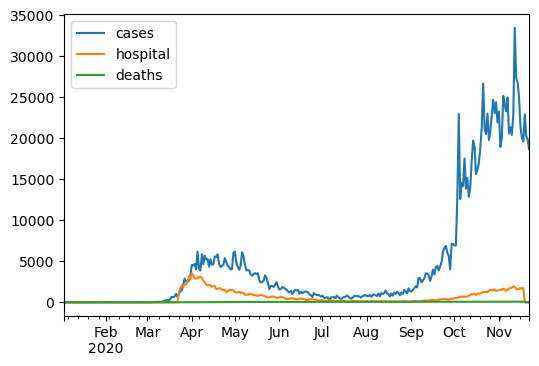

In [32]:
timeseriesdf.plot()

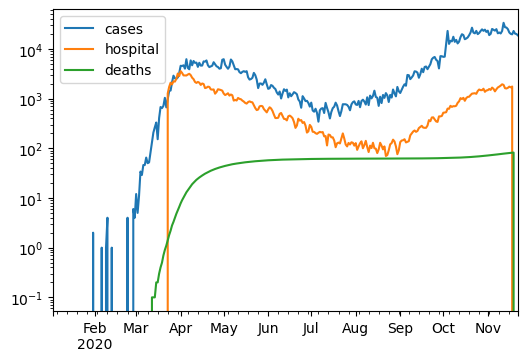

In [33]:
## For a log graph ##
timeseriesdf.plot(logy=True)

In [34]:
## lets try it with a JSON file I created, testcase.json ## 

In [35]:
## load data from JSON files ##

with open ("testcase.json", "rt") as TESTFILE:
    tcdata = json.load(TESTFILE)
    
tcdata    

{'data': [{'date': '2020-11-26', 'newcases': 14637, 'newtests': None},
  {'date': '2020-11-25', 'newcases': 15893, 'newtests': 275109},
  {'date': '2020-11-24', 'newcases': 9854, 'newtests': 257557},
  {'date': '2020-11-23', 'newcases': 13329, 'newtests': 166447},
  {'date': '2020-11-22', 'newcases': 16668, 'newtests': 204444},
  {'date': '2020-11-21', 'newcases': 17615, 'newtests': 292050},
  {'date': '2020-11-20', 'newcases': 17845, 'newtests': 319264},
  {'date': '2020-11-19', 'newcases': 20291, 'newtests': 314969},
  {'date': '2020-11-18', 'newcases': 17189, 'newtests': 292040},
  {'date': '2020-11-17', 'newcases': 17549, 'newtests': 237965},
  {'date': '2020-11-16', 'newcases': 19423, 'newtests': 188045},
  {'date': '2020-11-15', 'newcases': 21998, 'newtests': 238240},
  {'date': '2020-11-14', 'newcases': 24298, 'newtests': 290889},
  {'date': '2020-11-13', 'newcases': 24540, 'newtests': 324618},
  {'date': '2020-11-12', 'newcases': 30843, 'newtests': 322226},
  {'date': '2020-11-

In [36]:
tcdatalist=tcdata['data']
tcdatalist

[{'date': '2020-11-26', 'newcases': 14637, 'newtests': None},
 {'date': '2020-11-25', 'newcases': 15893, 'newtests': 275109},
 {'date': '2020-11-24', 'newcases': 9854, 'newtests': 257557},
 {'date': '2020-11-23', 'newcases': 13329, 'newtests': 166447},
 {'date': '2020-11-22', 'newcases': 16668, 'newtests': 204444},
 {'date': '2020-11-21', 'newcases': 17615, 'newtests': 292050},
 {'date': '2020-11-20', 'newcases': 17845, 'newtests': 319264},
 {'date': '2020-11-19', 'newcases': 20291, 'newtests': 314969},
 {'date': '2020-11-18', 'newcases': 17189, 'newtests': 292040},
 {'date': '2020-11-17', 'newcases': 17549, 'newtests': 237965},
 {'date': '2020-11-16', 'newcases': 19423, 'newtests': 188045},
 {'date': '2020-11-15', 'newcases': 21998, 'newtests': 238240},
 {'date': '2020-11-14', 'newcases': 24298, 'newtests': 290889},
 {'date': '2020-11-13', 'newcases': 24540, 'newtests': 324618},
 {'date': '2020-11-12', 'newcases': 30843, 'newtests': 322226},
 {'date': '2020-11-11', 'newcases': 19970, 

In [37]:
tcdates = [dictionary['date'] for dictionary in tcdatalist ]
tcdates.sort()
tcdates

['2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-

In [38]:
## check the above for duplicates, missing values ##
## find earliest and latest date > convert to *pandas* type for dates ##
## N.B here that I defined pandas as pnd not pd - just got an error##

def parse_date(datestring):
    return pnd.to_datetime(datestring, format="%Y-%m-%d")

In [39]:
startdate=parse_date(tcdates[0])
enddate=parse_date(tcdates[-1])
print(startdate, ' to ', enddate)

2020-01-03 00:00:00  to  2020-11-26 00:00:00


In [40]:
index = pnd.date_range(startdate, enddate, freq='D')
testcasedataframe=pnd.DataFrame(index=index, columns=['newtests', 'newcases'])
testcasedataframe

,newtests,newcases
2020-01-03,NaN,NaN
2020-01-04,NaN,NaN
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
...,...,...
2020-11-22,NaN,NaN
2020-11-23,NaN,NaN
2020-11-24,NaN,NaN
2020-11-25,NaN,NaN


In [41]:
for x in tcdatalist:
    date=parse_date(x['date'])
    for column in ['newcases', 'newtests']:
        if pnd.isna(testcasedataframe.loc[date, column]):
            value=float(x[column]) if x[column]!=None else 0.0
            testcasedataframe.loc[date, column]=value
            
testcasedataframe.fillna(0.0, inplace=True)
testcasedataframe

,newtests,newcases
2020-01-03,0.0,0.0
2020-01-04,0.0,0.0
2020-01-05,0.0,0.0
2020-01-06,0.0,0.0
2020-01-07,0.0,0.0
...,...,...
2020-11-22,204444.0,16668.0
2020-11-23,166447.0,13329.0
2020-11-24,257557.0,9854.0
2020-11-25,275109.0,15893.0


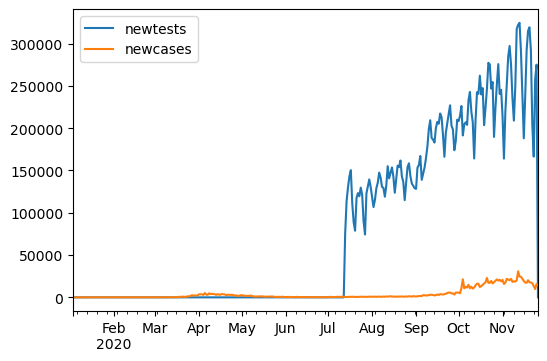

In [42]:
testcasedataframe.plot()

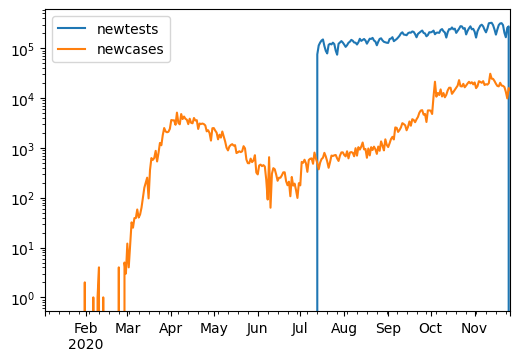

In [43]:
testcasedataframe.plot(logy=True)

In [44]:
## Age distribution Date Munging ##
## No fixed rules - see what format the data is in > decide what the format needs to be > wrangle accordingly ##
## e.g. *DataFrame* we need with Age ranges as index, values for males and females as columns ##
## The data is provided as a list, the first and only element of which is a dictionary ## 
## >> first extract the dictionary ##

In [45]:
## First get the JSON file data ##
with open ("agedistribution.json", "rt") as INFILE:
    data=json.load(INFILE)
data    

{'data': [{'males': [{'age': '70_to_74', 'value': 19599, 'rate': 1473.4},
    {'age': '5_to_9', 'value': 11880, 'rate': 656.5},
    {'age': '80_to_84', 'value': 16512, 'rate': 2598.4},
    {'age': '55_to_59', 'value': 42065, 'rate': 2183},
    {'age': '75_to_79', 'value': 17010, 'rate': 1888.5},
    {'age': '30_to_34', 'value': 48672, 'rate': 2517.8},
    {'age': '45_to_49', 'value': 42472, 'rate': 2498.1},
    {'age': '35_to_39', 'value': 43806, 'rate': 2304.9},
    {'age': '15_to_19', 'value': 47528, 'rate': 2764.1},
    {'age': '0_to_4', 'value': 11192, 'rate': 661},
    {'age': '65_to_69', 'value': 21897, 'rate': 1618.6},
    {'age': '60_to_64', 'value': 32122, 'rate': 2103.3},
    {'age': '40_to_44', 'value': 40384, 'rate': 2184},
    {'age': '10_to_14', 'value': 20754, 'rate': 1145.1},
    {'age': '50_to_54', 'value': 45777, 'rate': 2488.8},
    {'age': '85_to_89', 'value': 13317, 'rate': 3795.6},
    {'age': '20_to_24', 'value': 58320, 'rate': 3673.2},
    {'age': '90+', 'value'

In [46]:
datadic=data['data'][0] # data['data'] as a list
datadic

{'males': [{'age': '70_to_74', 'value': 19599, 'rate': 1473.4},
  {'age': '5_to_9', 'value': 11880, 'rate': 656.5},
  {'age': '80_to_84', 'value': 16512, 'rate': 2598.4},
  {'age': '55_to_59', 'value': 42065, 'rate': 2183},
  {'age': '75_to_79', 'value': 17010, 'rate': 1888.5},
  {'age': '30_to_34', 'value': 48672, 'rate': 2517.8},
  {'age': '45_to_49', 'value': 42472, 'rate': 2498.1},
  {'age': '35_to_39', 'value': 43806, 'rate': 2304.9},
  {'age': '15_to_19', 'value': 47528, 'rate': 2764.1},
  {'age': '0_to_4', 'value': 11192, 'rate': 661},
  {'age': '65_to_69', 'value': 21897, 'rate': 1618.6},
  {'age': '60_to_64', 'value': 32122, 'rate': 2103.3},
  {'age': '40_to_44', 'value': 40384, 'rate': 2184},
  {'age': '10_to_14', 'value': 20754, 'rate': 1145.1},
  {'age': '50_to_54', 'value': 45777, 'rate': 2488.8},
  {'age': '85_to_89', 'value': 13317, 'rate': 3795.6},
  {'age': '20_to_24', 'value': 58320, 'rate': 3673.2},
  {'age': '90+', 'value': 9063, 'rate': 5452},
  {'age': '25_to_29',

In [47]:
# Now we can grab the lists of entries for males and females separately 

males=datadic['males']
females=datadic['females']
males #females is similar 

[{'age': '70_to_74', 'value': 19599, 'rate': 1473.4},
 {'age': '5_to_9', 'value': 11880, 'rate': 656.5},
 {'age': '80_to_84', 'value': 16512, 'rate': 2598.4},
 {'age': '55_to_59', 'value': 42065, 'rate': 2183},
 {'age': '75_to_79', 'value': 17010, 'rate': 1888.5},
 {'age': '30_to_34', 'value': 48672, 'rate': 2517.8},
 {'age': '45_to_49', 'value': 42472, 'rate': 2498.1},
 {'age': '35_to_39', 'value': 43806, 'rate': 2304.9},
 {'age': '15_to_19', 'value': 47528, 'rate': 2764.1},
 {'age': '0_to_4', 'value': 11192, 'rate': 661},
 {'age': '65_to_69', 'value': 21897, 'rate': 1618.6},
 {'age': '60_to_64', 'value': 32122, 'rate': 2103.3},
 {'age': '40_to_44', 'value': 40384, 'rate': 2184},
 {'age': '10_to_14', 'value': 20754, 'rate': 1145.1},
 {'age': '50_to_54', 'value': 45777, 'rate': 2488.8},
 {'age': '85_to_89', 'value': 13317, 'rate': 3795.6},
 {'age': '20_to_24', 'value': 58320, 'rate': 3673.2},
 {'age': '90+', 'value': 9063, 'rate': 5452},
 {'age': '25_to_29', 'value': 50797, 'rate': 283

In [48]:
## Age bands are the same in both cases so we can extract them from one list ##

agerange=[x['age'] for x in males] #each entry of males is a dictionary 
print(agerange)

['70_to_74', '5_to_9', '80_to_84', '55_to_59', '75_to_79', '30_to_34', '45_to_49', '35_to_39', '15_to_19', '0_to_4', '65_to_69', '60_to_64', '40_to_44', '10_to_14', '50_to_54', '85_to_89', '20_to_24', '90+', '25_to_29']


In [49]:
## Better but we need the dataframe index to be nicely sorted. Can use the lower limit of the age bands as a sort key. ##
## extract as below ##

def min_age(agerange):
    agerange=agerange.replace('+', '') #remove + from 90+
    start=agerange.split('_')[0]
    return int(start)

print(min_age('85_to_89'))
print(min_age('90+'))

85
90


In [50]:
## Now the min_age function can be used as a key for the sort() function ##

agerange.sort(key=min_age)
print(agerange)

['0_to_4', '5_to_9', '10_to_14', '15_to_19', '20_to_24', '25_to_29', '30_to_34', '35_to_39', '40_to_44', '45_to_49', '50_to_54', '55_to_59', '60_to_64', '65_to_69', '70_to_74', '75_to_79', '80_to_84', '85_to_89', '90+']


In [51]:
## Finally, we are ready to define the *DataFrame* - ##
## Using agerange as an index - with columns for male, female and a total of the two ##

age_df = pnd.DataFrame(index=agerange, columns=['males', 'females', 'total'])

In [52]:
## To fill the DataFrame, we need to loop separately over the values for males and females - assigning each value...##
## to the corresponding age band and column. ##
## Then we compute the total column as a sum of the male and female columns (Handy DateFrame Feature) ##

for entry in males: # each entry is a dictionary 
    ageband=entry['age'] #our index position
    age_df.loc[ageband, 'males']=entry['value']
    
for entry in females: 
    ageband=entry['age']
    age_df.loc[ageband, 'females']=entry['value']
    
# this is straightforward 

age_df['total']=age_df['males']+age_df['females']

age_df

,males,females,total
0_to_4,11192,10691,21883
5_to_9,11880,11012,22892
10_to_14,20754,20298,41052
15_to_19,47528,58733,106261
20_to_24,58320,70135,128455
25_to_29,50797,63042,113839
30_to_34,48672,58823,107495
35_to_39,43806,53344,97150
40_to_44,40384,50218,90602
45_to_49,42472,52793,95265


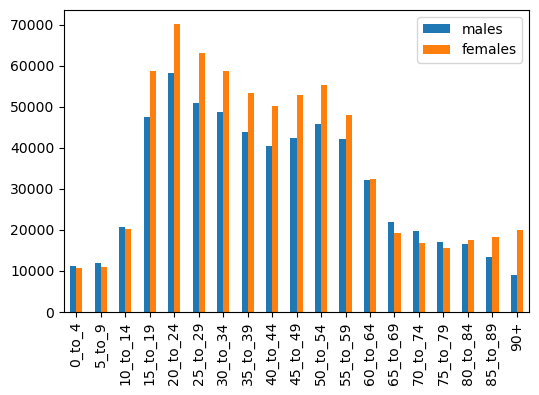

In [53]:
## plotting 

age_df.plot(kind='bar', y=['males', 'females'])


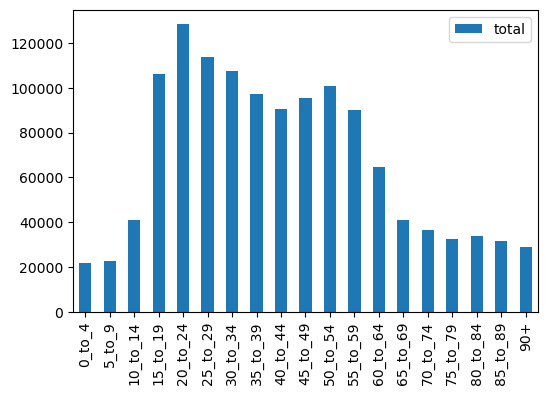

In [54]:
age_df.plot(kind='bar', y='total')

In [55]:
## will not need to save DataFrames in the actual dashboard, can add interactive controls to the graphs as we plot ##
## while developing we want to save the wrangled data to experiment with the controls ##
## PANDAS makes this easy with Pickle file format - To save to pickle use below ##

timeseriesdf.to_pickle("timeseriesdf.pkl")
age_df.to_pickle("agedf.pkl")

In [56]:
with open("ocvscap.json", "rt") as INFILE:
    data=json.load(INFILE)

In [57]:
data

{'data': [{'date': '2020-11-25',
   'hospitalcases': None,
   'newadmissions': None,
   'plannedcapacity': 655225},
  {'date': '2020-11-24',
   'hospitalcases': 16341,
   'newadmissions': None,
   'plannedcapacity': 649225},
  {'date': '2020-11-23',
   'hospitalcases': 16596,
   'newadmissions': None,
   'plannedcapacity': 646956},
  {'date': '2020-11-22',
   'hospitalcases': 16218,
   'newadmissions': None,
   'plannedcapacity': 657006},
  {'date': '2020-11-21',
   'hospitalcases': 16026,
   'newadmissions': 1434,
   'plannedcapacity': 659188},
  {'date': '2020-11-20',
   'hospitalcases': 16180,
   'newadmissions': 1513,
   'plannedcapacity': 658426},
  {'date': '2020-11-19',
   'hospitalcases': 16449,
   'newadmissions': 1652,
   'plannedcapacity': 658871},
  {'date': '2020-11-18',
   'hospitalcases': 16510,
   'newadmissions': 1759,
   'plannedcapacity': 657571},
  {'date': '2020-11-17',
   'hospitalcases': 16481,
   'newadmissions': 1690,
   'plannedcapacity': 650791},
  {'date': '

In [58]:
datalist=data['data']
datalist

[{'date': '2020-11-25',
  'hospitalcases': None,
  'newadmissions': None,
  'plannedcapacity': 655225},
 {'date': '2020-11-24',
  'hospitalcases': 16341,
  'newadmissions': None,
  'plannedcapacity': 649225},
 {'date': '2020-11-23',
  'hospitalcases': 16596,
  'newadmissions': None,
  'plannedcapacity': 646956},
 {'date': '2020-11-22',
  'hospitalcases': 16218,
  'newadmissions': None,
  'plannedcapacity': 657006},
 {'date': '2020-11-21',
  'hospitalcases': 16026,
  'newadmissions': 1434,
  'plannedcapacity': 659188},
 {'date': '2020-11-20',
  'hospitalcases': 16180,
  'newadmissions': 1513,
  'plannedcapacity': 658426},
 {'date': '2020-11-19',
  'hospitalcases': 16449,
  'newadmissions': 1652,
  'plannedcapacity': 658871},
 {'date': '2020-11-18',
  'hospitalcases': 16510,
  'newadmissions': 1759,
  'plannedcapacity': 657571},
 {'date': '2020-11-17',
  'hospitalcases': 16481,
  'newadmissions': 1690,
  'plannedcapacity': 650791},
 {'date': '2020-11-16',
  'hospitalcases': 16360,
  'new

In [59]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
dates

['2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-11',
 '2020-05-12',
 '2020-05-13',
 '2020-05-14',
 '2020-05-15',
 '2020-05-16',
 '2020-05-17',
 '2020-05-18',
 '2020-05-19',
 '2020-05-20',
 '2020-05-21',
 '2020-05-22',
 '2020-05-23',
 '2020-05-24',
 '2020-05-

In [60]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pnd.to_datetime(datestring, format="%Y-%m-%d")

In [61]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

2020-03-20 00:00:00  to  2020-11-25 00:00:00


In [62]:
index=pnd.date_range(startdate, enddate, freq='D')
plancapdf=pnd.DataFrame(index=index, columns=['newadmissions', 'hospitalcases', 'plannedcapacity'])
plancapdf

,newadmissions,hospitalcases,plannedcapacity
2020-03-20,NaN,NaN,NaN
2020-03-21,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN
2020-03-23,NaN,NaN,NaN
2020-03-24,NaN,NaN,NaN
...,...,...,...
2020-11-21,NaN,NaN,NaN
2020-11-22,NaN,NaN,NaN
2020-11-23,NaN,NaN,NaN
2020-11-24,NaN,NaN,NaN


In [63]:
for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['newadmissions', 'hospitalcases', 'plannedcapacity']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pnd.isna(plancapdf.loc[date, column]): 
            # replace None with 0 in our data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            plancapdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
plancapdf.fillna(0.0, inplace=True)
            
plancapdf

,newadmissions,hospitalcases,plannedcapacity
2020-03-20,0.0,0.0,6127.0
2020-03-21,0.0,0.0,6127.0
2020-03-22,0.0,0.0,10949.0
2020-03-23,1271.0,0.0,10949.0
2020-03-24,1719.0,0.0,10949.0
...,...,...,...
2020-11-21,1434.0,16026.0,659188.0
2020-11-22,0.0,16218.0,657006.0
2020-11-23,0.0,16596.0,646956.0
2020-11-24,0.0,16341.0,649225.0


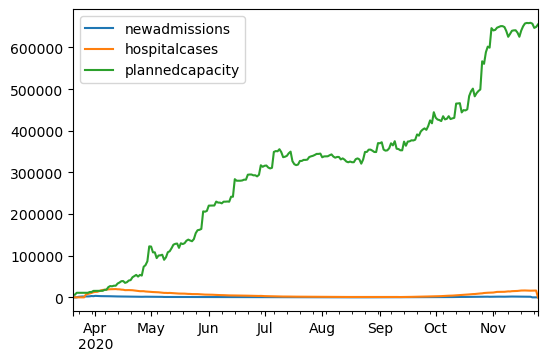

In [64]:
plancapdf.plot()

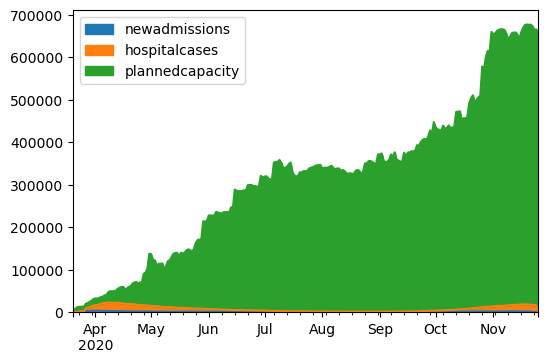

In [65]:
plancapdf.plot.area()

In [66]:
category=wdg.SelectMultiple(
    options=['newadmissions', 'hospitalcases', 'plannedcapacity'], # options available
    value=['newadmissions', 'hospitalcases', 'plannedcapacity'], # initial value
    rows=3, # rows of the selection box
    description='View',
    disabled=False
)

def plancap_graph(graphcolumns):
    # our callback function.
    ncols=len(graphcolumns)
    if ncols>0:
        plancapdf.plot.area() # graphcolumns is a tuple - we need a list
    else:
        # if the user has not selected any column, print a message instead
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
    
# keep calling age_graph(graphcolumns=value_of_agecols); capture output in variable output    
output=wdg.interactive_output(plancap_graph, {'graphcolumns': category})

display(category, output)

SelectMultiple(description='View', index=(0, 1, 2), options=('newadmissions', 'hospitalcases', 'plannedcapacit…

Output()